## Tutorial on converting WSIs

In this notebook, we will demonstrate how to convert any whole slide image (WSI)
from Olympus' cellSens VSI format to a TIFF format.

Converting to this new format, allows the images to be seemlessly used with any
other WSI processing framework, like OpenSlide, FAST, and cuCIM.

In [1]:
# Install JDK-8 and vips dependencies (here: macOS)
!brew install --cask zulu@8
!brew install vips

==> Downloading https://formulae.brew.sh/api/cask.jws.json
#=#=#                                                                           
==> Downloading https://formulae.brew.sh/api/formula.jws.json
#=#=#                                                                           
To reinstall 8.15.3, run:
  brew reinstall vips


In [2]:
# Configure bftools
!wget http://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip
!unzip bftools.zip

URL transformed to HTTPS due to an HSTS policy
--2024-09-02 23:05:59--  https://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip
Resolving downloads.openmicroscopy.org (downloads.openmicroscopy.org)... 134.36.65.239
Connecting to downloads.openmicroscopy.org (downloads.openmicroscopy.org)|134.36.65.239|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://downloads.openmicroscopy.org/bio-formats/5.6/artifacts/bftools.zip [following]
--2024-09-02 23:06:00--  https://downloads.openmicroscopy.org/bio-formats/5.6/artifacts/bftools.zip
Connecting to downloads.openmicroscopy.org (downloads.openmicroscopy.org)|134.36.65.239|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.openmicroscopy.org/bio-formats/5.6.0/artifacts/bftools.zip [following]
--2024-09-02 23:06:00--  https://downloads.openmicroscopy.org/bio-formats/5.6.0/artifacts/bftools.zip
Connecting to downloads.openmicr

In [3]:
## Install vsi2tif from source
!pip install git+https://github.com/andreped/vsi2tif

  Cloning https://github.com/andreped/vsi2tif to /private/var/folders/k0/9nz8fj4d1dx9g7ywxfnr8c5h0000gq/T/pip-req-build-e6bn_gg6
  Running command git clone --filter=blob:none --quiet https://github.com/andreped/vsi2tif /private/var/folders/k0/9nz8fj4d1dx9g7ywxfnr8c5h0000gq/T/pip-req-build-e6bn_gg6
  Resolved https://github.com/andreped/vsi2tif to commit ea364b628e1e12dd25a0123bef48b09251ba2e7a
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# Download test sample
!wget https://openslide.cs.cmu.edu/download/openslide-testdata/Olympus/OS-2.zip
!unzip OS-2.zip

--2024-09-02 23:06:13--  https://openslide.cs.cmu.edu/download/openslide-testdata/Olympus/OS-2.zip
Resolving openslide.cs.cmu.edu (openslide.cs.cmu.edu)... 128.2.209.93
Connecting to openslide.cs.cmu.edu (openslide.cs.cmu.edu)|128.2.209.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309552104 (295M) [application/zip]
Saving to: ‘OS-2.zip’

OS-2.zip            100%[===================>] 295,21M  3,20MB/s    in 96s     

2024-09-02 23:07:50 (3,07 MB/s) - ‘OS-2.zip’ saved [309552104/309552104]

Archive:  OS-2.zip
  inflating: OS-2.vsi                
   creating: _OS-2_/
   creating: _OS-2_/stack10001/
  inflating: _OS-2_/stack10001/frame_t.ets  
   creating: _OS-2_/stack1/
  inflating: _OS-2_/stack1/frame_t.ets  


In [6]:
# Test that vsi2tif tool can be accessed from terminal
!vsi2tif -h

usage: vsi2tif [-h] -i INPUT -o OUTPUT -b BFCONVERT [-c COMPRESSION]
               [-s TILESIZE] [-p PLANE] [-q QUALITY] [-m MAX_MEM] [-v VERBOSE]

vsi2tif - simple tool for converting images from cellSens VSI to Generic TIFF

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        folder with input files
  -o OUTPUT, --output OUTPUT
                        folder for output files
  -b BFCONVERT, --bfconvert BFCONVERT
                        path to bfconvert tool
  -c COMPRESSION, --compression COMPRESSION
                        compression technique for final image
  -s TILESIZE, --tilesize TILESIZE
                        tile size to use during both conversion steps
  -p PLANE, --plane PLANE
                        which image plane to convert image from
  -q QUALITY, --quality QUALITY
                        compression quality used with JPEG compression
  -m MAX_MEM, --max-mem MAX_MEM
                        set maximum

In [7]:
# Convert a single WSI to Generic TIFF with reduced verbosity
!vsi2tif -i ./OS-2.vsi -o ./OS-2.tif -b bftools/bfconvert -v 0

INFO:root:Performing single conversion...
Processing took 14.809 seconds


# Using converted image with OpenSlide

In [11]:
# Install OpenSlide binaries
!brew install openslide
!pip install openslide-bin

To reinstall 4.0.0, run:
  brew reinstall openslide

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [12]:
# Install Python OpenSlide SDK and Matplotlib for visualization
!pip install openslide-python matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


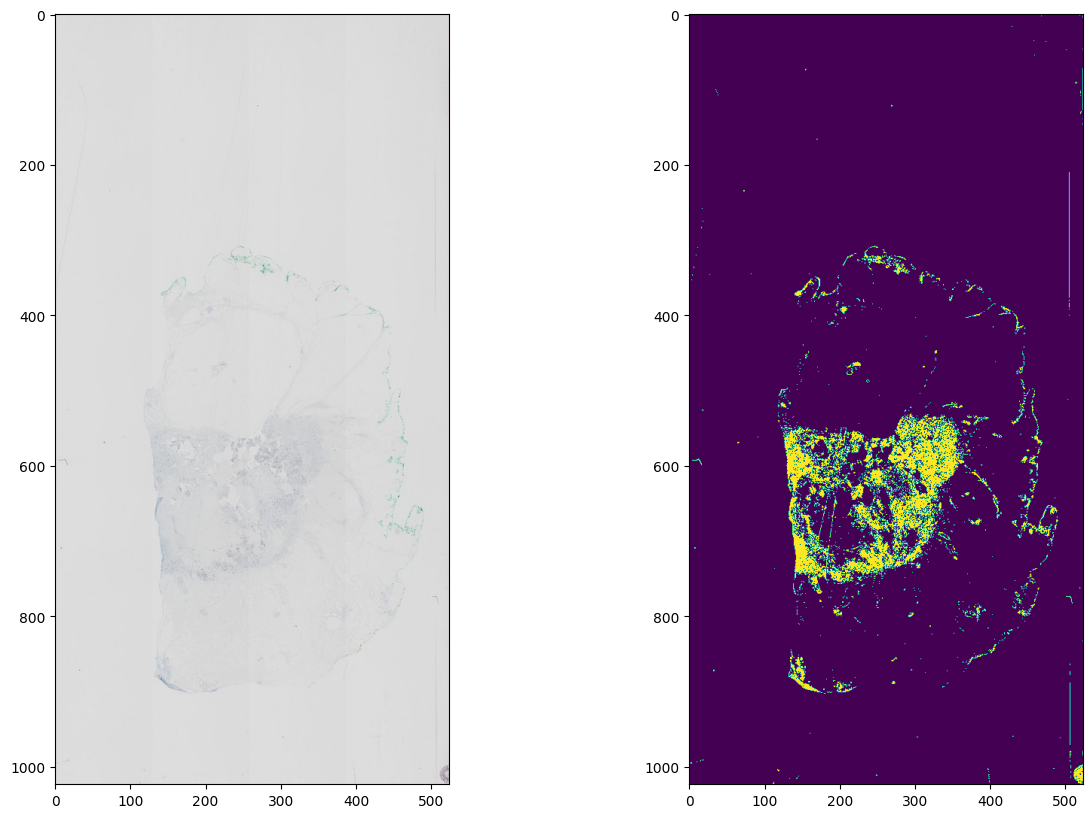

In [14]:
import openslide_bin
import openslide as ops
import matplotlib.pyplot as plt
import numpy as np

image = ops.OpenSlide('OS-2.tif')
thumbnail = image.get_thumbnail(size=(1024, 1024))
thresh = (np.mean(np.asarray(thumbnail), axis=-1) < 210).astype("uint8")

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(thumbnail)
ax[1].imshow(thresh)